In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import os

if not os.path.exists("figures"):
    os.makedirs("figures")

In [2]:
def load_oneNode_curve(filedir):
    mydata = np.genfromtxt(filedir,delimiter="\t")
    time = [i[0] for i in mydata]
    suc = [i[1] for i in mydata]
    res = [i[2] for i in mydata]
    ant = [i[3] for i in mydata]
    sou = [i[4] for i in mydata]
    
    d = {'time':time,'suc':suc,'res':res,'sou':sou}
    return pd.DataFrame(d)

NamesDict = {'time':'time','suc':'Suceptible Bacteria','res':'Resistant Bacteria','sou':'Resource'}

def load_oneNode_DR(filedir):
    mydata = np.genfromtxt(filedir,delimiter="\t")
    ant = [i[0] for i in mydata]
    suc = [i[1] for i in mydata]
    res = [i[2] for i in mydata]
    
    d = {'ant':ant,'suc':suc,'res':res}
    return pd.DataFrame(d)

def find_msc(df):
    return df['ant'][df['suc'] < df['res']].iloc[0]

In [3]:
df1 = load_oneNode_curve("output/single_node_curve_0ant")
df2 = load_oneNode_curve("output/single_node_curve_1ant")
dfDR = load_oneNode_DR("output/sim_DR_node")

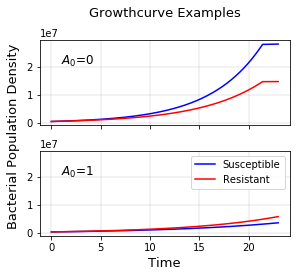

In [4]:
fontsize = 13

fig = plt.figure(figsize=(4,4))

ax1 = plt.subplot2grid((4,4), (0,0),rowspan=2,colspan=4)
ax2 = plt.subplot2grid((4,4), (2, 0),rowspan=2,colspan=4,sharex=ax1,sharey=ax1)

ax1.plot(df1['time'],df1['suc'],'b',df1['time'],df1['res'],'r')
ax1.set_title("Growthcurve Examples",fontsize=fontsize,y=1.2)
ax1.grid(color='black', linestyle='-', linewidth=0.1)
ax1.text(0.15,0.75,"$A_0$=0",horizontalalignment='center',
     verticalalignment='center',
     transform = ax1.transAxes,fontsize=12)

ax2.plot(df2['time'],df2['suc'],'b',df2['time'],df2['res'],'r')
ax2.set_xlabel("Time",fontsize=fontsize)
ax2.grid(color='black', linestyle='-', linewidth=0.1)
ax2.text(0.15,0.75,"$A_0$=1",horizontalalignment='center',
     verticalalignment='center',
     transform = ax2.transAxes,fontsize=12)
ax2.legend(["Susceptible","Resistant"],loc='best')

plt.setp(ax1.get_xticklabels(), visible=False)
fig.text(-0.03, 0.5, 'Bacterial Population Density', va='center', rotation='vertical',fontsize = fontsize)

plt.tight_layout()

plt.savefig("figures/THESIS_GROWTHCURVES.png",dpi=180,bbox_inches='tight')
plt.show()

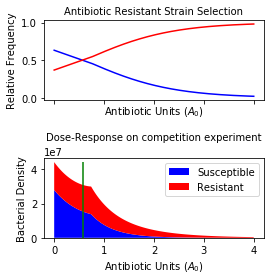

In [5]:
fontsize = 10

fig = plt.figure(figsize=(4,4))

ax1 = plt.subplot2grid((4,4), (0,0),rowspan=2,colspan=4)
ax2 = plt.subplot2grid((4,4), (2, 0),rowspan=2,colspan=4,sharex=ax1)

ax1.plot(dfDR['ant'],np.divide(dfDR['suc'],np.add(dfDR['suc'],dfDR['res'])),'b',dfDR['ant'],np.divide(dfDR['res'],np.add(dfDR['suc'],dfDR['res'])),'r')
ax1.set_xlabel("Antibiotic Units ($A_0$)",fontsize=fontsize)
ax1.set_ylabel("Relative Frequency",fontsize=fontsize)
ax1.set_title("Antibiotic Resistant Strain Selection",fontsize=fontsize,y=1.)

ax2.stackplot(dfDR['ant'],dfDR['suc'],dfDR['res'],colors=['b','r'])
ax2.set_xlabel("Antibiotic Units ($A_0$)",fontsize=fontsize,y=1.07)
ax2.set_ylabel("Bacterial Density",fontsize=fontsize)
ax2.set_title("Dose-Response on competition experiment",fontsize=fontsize,y=1.15)
ax2.legend(["Susceptible","Resistant"],loc='best')
ax2.vlines(find_msc(dfDR),ymin=0,ymax=np.max(np.add(dfDR['suc'],dfDR['res'])),colors=['g'])

plt.setp(ax1.get_xticklabels(), visible=False)

plt.tight_layout()

plt.savefig("figures/THESIS_GROWTHCURVES2_RELFREQ.png",dpi=180,bbox_inches='tight')
plt.show()

### Option 1: Stackplot in the middle

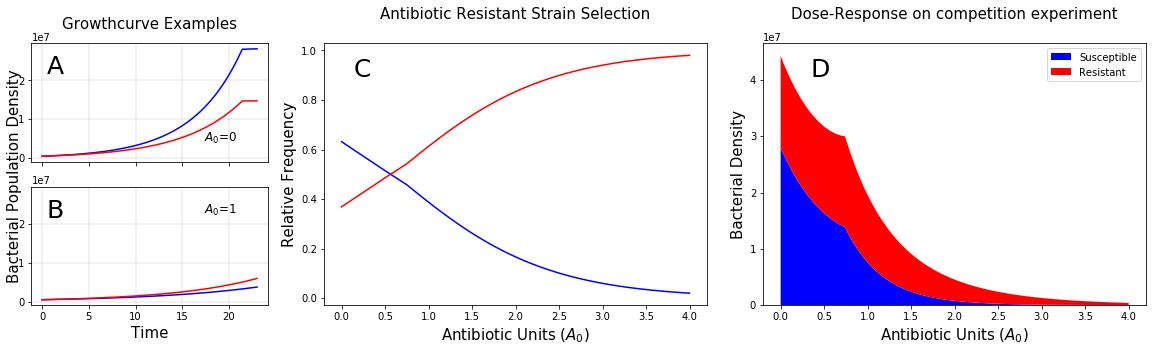

In [6]:
fontsize = 15

fig = plt.figure(figsize=(18,5))

ax1 = plt.subplot2grid((2,9), (0,0),colspan=2)
ax2 = plt.subplot2grid((2,9), (1, 0),colspan=2,sharex=ax1,sharey=ax1)
ax3 = plt.subplot2grid((2,9), (0, 2),colspan=3,rowspan=2)
ax4 = plt.subplot2grid((2,9), (0,5),colspan=3,rowspan=2,sharex=ax3)

ax1.plot(df1['time'],df1['suc'],'b',df1['time'],df1['res'],'r')
ax1.set_title("Growthcurve Examples",fontsize=fontsize,y=1.07)
ax1.grid(color='black', linestyle='-', linewidth=0.1)
ax1.text(0.1,0.8,"A",horizontalalignment='center',
     verticalalignment='center',
     transform = ax1.transAxes,fontsize=25)
ax1.text(0.8,0.2,"$A_0$=0",horizontalalignment='center',
     verticalalignment='center',
     transform = ax1.transAxes,fontsize=12)

ax2.plot(df2['time'],df2['suc'],'b',df2['time'],df2['res'],'r')
ax2.set_xlabel("Time",fontsize=fontsize)
ax2.grid(color='black', linestyle='-', linewidth=0.1)
ax2.text(0.1,0.8,"B",horizontalalignment='center',
     verticalalignment='center',
     transform = ax2.transAxes,fontsize=25)
ax2.text(0.8,0.8,"$A_0$=1",horizontalalignment='center',
     verticalalignment='center',
     transform = ax2.transAxes,fontsize=12)

ax3.plot(dfDR['ant'],np.divide(dfDR['suc'],np.add(dfDR['suc'],dfDR['res'])),'b',dfDR['ant'],np.divide(dfDR['res'],np.add(dfDR['suc'],dfDR['res'])),'r')
ax3.set_xlabel("Antibiotic Units ($A_0$)",fontsize=fontsize)
ax3.set_ylabel("Relative Frequency",fontsize=fontsize)
ax3.set_title("Antibiotic Resistant Strain Selection",fontsize=fontsize,y=1.07)
ax3.text(0.1,0.9,"C",horizontalalignment='center',
     verticalalignment='center',
     transform = ax3.transAxes,fontsize=25)

ax4.stackplot(dfDR['ant'],dfDR['suc'],dfDR['res'],colors=['b','r'])
ax4.set_xlabel("Antibiotic Units ($A_0$)",fontsize=fontsize,y=1.07)
ax4.set_ylabel("Bacterial Density",fontsize=fontsize)
ax4.set_title("Dose-Response on competition experiment",fontsize=fontsize,y=1.07)
ax4.text(0.15,0.9,"D",horizontalalignment='center',
     verticalalignment='center',
     transform = ax4.transAxes,fontsize=25)
ax4.legend(["Susceptible","Resistant"],loc='best')

plt.setp(ax1.get_xticklabels(), visible=False)
fig.text(0, 0.5, 'Bacterial Population Density', va='center', rotation='vertical',fontsize = fontsize)

plt.tight_layout()

plt.savefig("figures/Figure_Characterization_Stackplot.png",dpi=300,bbox_inches='tight')
plt.show()

### Option 2: No Vlines

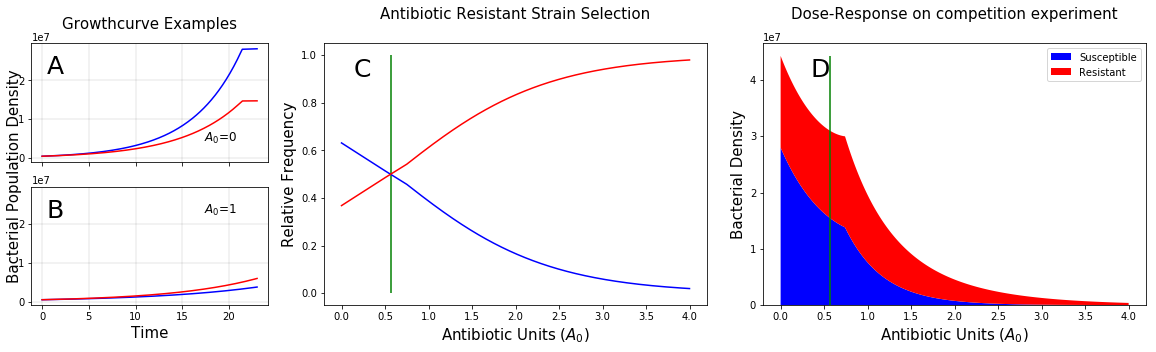

In [7]:
fontsize = 15

fig = plt.figure(figsize=(18,5))

ax1 = plt.subplot2grid((2,9), (0,0),colspan=2)
ax2 = plt.subplot2grid((2,9), (1, 0),colspan=2,sharex=ax1,sharey=ax1)
ax3 = plt.subplot2grid((2,9), (0, 2),colspan=3,rowspan=2)
ax4 = plt.subplot2grid((2,9), (0,5),colspan=3,rowspan=2,sharex=ax3)

ax1.plot(df1['time'],df1['suc'],'b',df1['time'],df1['res'],'r')
ax1.set_title("Growthcurve Examples",fontsize=fontsize,y=1.07)
ax1.grid(color='black', linestyle='-', linewidth=0.1)
ax1.text(0.1,0.8,"A",horizontalalignment='center',
     verticalalignment='center',
     transform = ax1.transAxes,fontsize=25)
ax1.text(0.8,0.2,"$A_0$=0",horizontalalignment='center',
     verticalalignment='center',
     transform = ax1.transAxes,fontsize=12)

ax2.plot(df2['time'],df2['suc'],'b',df2['time'],df2['res'],'r')
ax2.set_xlabel("Time",fontsize=fontsize)
ax2.grid(color='black', linestyle='-', linewidth=0.1)
ax2.text(0.1,0.8,"B",horizontalalignment='center',
     verticalalignment='center',
     transform = ax2.transAxes,fontsize=25)
ax2.text(0.8,0.8,"$A_0$=1",horizontalalignment='center',
     verticalalignment='center',
     transform = ax2.transAxes,fontsize=12)

ax3.plot(dfDR['ant'],np.divide(dfDR['suc'],np.add(dfDR['suc'],dfDR['res'])),'b',dfDR['ant'],np.divide(dfDR['res'],np.add(dfDR['suc'],dfDR['res'])),'r')
ax3.set_xlabel("Antibiotic Units ($A_0$)",fontsize=fontsize)
ax3.set_ylabel("Relative Frequency",fontsize=fontsize)
ax3.set_title("Antibiotic Resistant Strain Selection",fontsize=fontsize,y=1.07)
ax3.text(0.1,0.9,"C",horizontalalignment='center',
     verticalalignment='center',
     transform = ax3.transAxes,fontsize=25)
ax3.vlines(find_msc(dfDR),ymin=0,ymax=1,colors=['g'])

ax4.stackplot(dfDR['ant'],dfDR['suc'],dfDR['res'],colors=['b','r'])
ax4.set_xlabel("Antibiotic Units ($A_0$)",fontsize=fontsize,y=1.07)
ax4.set_ylabel("Bacterial Density",fontsize=fontsize)
ax4.set_title("Dose-Response on competition experiment",fontsize=fontsize,y=1.07)
ax4.text(0.15,0.9,"D",horizontalalignment='center',
     verticalalignment='center',
     transform = ax4.transAxes,fontsize=25)
ax4.legend(["Susceptible","Resistant"],loc='best')
ax4.vlines(find_msc(dfDR),ymin=0,ymax=np.max(np.add(dfDR['suc'],dfDR['res'])),colors=['g'])

plt.setp(ax1.get_xticklabels(), visible=False)
fig.text(0, 0.5, 'Bacterial Population Density', va='center', rotation='vertical',fontsize = fontsize)

plt.tight_layout()

plt.savefig("figures/Figure_Characterization_Stackplot_vlines.png",dpi=300,bbox_inches='tight')
plt.show()

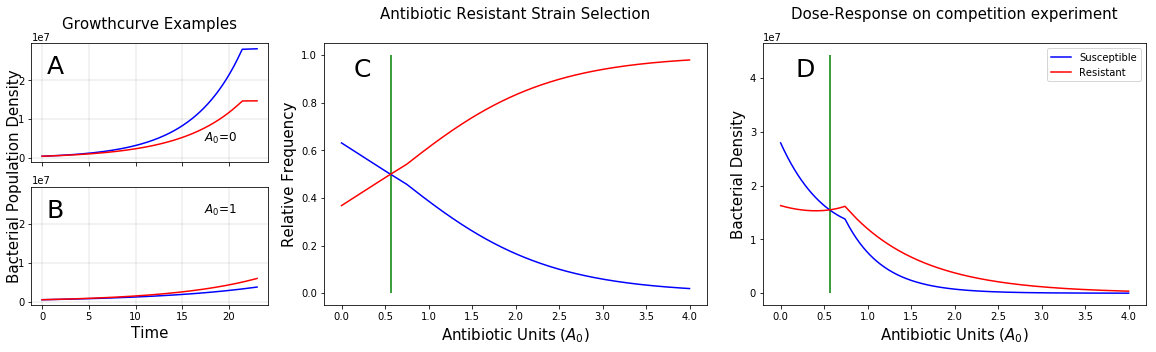

In [8]:
fontsize = 15

fig = plt.figure(figsize=(18,5))

ax1 = plt.subplot2grid((2,9), (0,0),colspan=2)
ax2 = plt.subplot2grid((2,9), (1, 0),colspan=2,sharex=ax1,sharey=ax1)
ax3 = plt.subplot2grid((2,9), (0, 2),colspan=3,rowspan=2)
ax4 = plt.subplot2grid((2,9), (0,5),colspan=3,rowspan=2,sharex=ax3)

ax1.plot(df1['time'],df1['suc'],'b',df1['time'],df1['res'],'r')
ax1.set_title("Growthcurve Examples",fontsize=fontsize,y=1.07)
ax1.grid(color='black', linestyle='-', linewidth=0.1)
ax1.text(0.1,0.8,"A",horizontalalignment='center',
     verticalalignment='center',
     transform = ax1.transAxes,fontsize=25)
ax1.text(0.8,0.2,"$A_0$=0",horizontalalignment='center',
     verticalalignment='center',
     transform = ax1.transAxes,fontsize=12)

ax2.plot(df2['time'],df2['suc'],'b',df2['time'],df2['res'],'r')
ax2.set_xlabel("Time",fontsize=fontsize)
ax2.grid(color='black', linestyle='-', linewidth=0.1)
ax2.text(0.1,0.8,"B",horizontalalignment='center',
     verticalalignment='center',
     transform = ax2.transAxes,fontsize=25)
ax2.text(0.8,0.8,"$A_0$=1",horizontalalignment='center',
     verticalalignment='center',
     transform = ax2.transAxes,fontsize=12)

ax3.plot(dfDR['ant'],np.divide(dfDR['suc'],np.add(dfDR['suc'],dfDR['res'])),'b',dfDR['ant'],np.divide(dfDR['res'],np.add(dfDR['suc'],dfDR['res'])),'r')
ax3.set_xlabel("Antibiotic Units ($A_0$)",fontsize=fontsize)
ax3.set_ylabel("Relative Frequency",fontsize=fontsize)
ax3.set_title("Antibiotic Resistant Strain Selection",fontsize=fontsize,y=1.07)
ax3.text(0.1,0.9,"C",horizontalalignment='center',
     verticalalignment='center',
     transform = ax3.transAxes,fontsize=25)

ax3.vlines(find_msc(dfDR),ymin=0,ymax=1,colors=['g'])

ax4.plot(dfDR['ant'],dfDR['suc'],'b',dfDR['ant'],dfDR['res'],'r')
ax4.set_xlabel("Antibiotic Units ($A_0$)",fontsize=fontsize,y=1.07)
ax4.set_ylabel("Bacterial Density",fontsize=fontsize)
ax4.set_title("Dose-Response on competition experiment",fontsize=fontsize,y=1.07)
ax4.text(0.11,0.9,"D",horizontalalignment='center',
     verticalalignment='center',
     transform = ax4.transAxes,fontsize=25)

ax4.vlines(find_msc(dfDR),ymin=0,ymax=np.max(np.add(dfDR['suc'],dfDR['res'])),colors=['g'])


ax4.legend(["Susceptible","Resistant"],loc='best')

plt.setp(ax1.get_xticklabels(), visible=False)
fig.text(0, 0.5, 'Bacterial Population Density', va='center', rotation='vertical',fontsize = fontsize)

plt.tight_layout()

plt.savefig("figures/Figure_Characterization_normal_vline.png")
plt.show()